<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
<b>نتفلیکس</b>
</font>
</h2>


<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
مقدمه
</font>
</h2>

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
در این تمرین نمودار‌هایی را با توجه داده‌های شرکت نتفلیکس رسم می‌کنیم و با توجه به آنها تحلیل‌هایی ارائه می‌کنیم.
<br>
کتابخانه‌هایی که برای مصورسازی استفاده می‌کنیم مت‌پلات‌لیب، پلاتلی و سیبورن خواهند بود.
</font>
</p>


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
# import plotly as py
# import plotly.graph_objs as go
import os
# py.offline.init_notebook_mode(connected = True)
import datetime as dt
plt.rcParams['figure.dpi'] = 140


<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
در بخش اول کمی تمیزکاری در داده‌ها خواهیم داشت.
<br>
در ستون‌های cast , director به جای مقادیر خالی عبارت "No Data" قرار دهید و در بقیه ردیف‌هایی که مقادیر خالی دارند را حذف کنید.
<br>
در انتها نباید هیچ مقدار خالی و گم‌شده‌ای وجود داشته باشد.
</font>
</p>


In [2]:
df = pd.read_csv("netflix_titles.csv")
df.cast = df.cast.fillna("No Data")
df.director = df.director.fillna("No Data")
df = df.dropna()
df = df.reset_index()

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
در بخش بعدی با توجه به ستون date_added ستون‌های:
    <br>
    month_added (ماهی که فیلم اضافه شده)<br>
    month_name_added (نام ماهی که فیلم اضافه شده مثلا ژانویه)<br>
    year_added (سالی که فیلم اضافه شده) را اضافه کنید  
</font>
</p>


In [3]:
df.date_added
date_added = np.array(df.date_added)
month_added ,month_name_added ,year_added = 0 ,None ,0
months = {
    'January' : 1,
    'February' : 2,
    'March' : 3,
    'April' : 4,
    'May' : 5,
    'June' : 6,
    'July' : 7,
    'August' : 8,
    'September' : 9,
    'October' : 10,
    'November' : 11,
    'December' : 12,
    
}

date = np.array([month_added ,month_name_added ,year_added])
for row in date_added:
    month_name_added = row.split()[0]
    year_added = row.split()[2]
    month_added = months[month_name_added]
#     print( row , " " , month_added ," ",month_name_added," " ,year_added)
    date = np.append(date, (month_added, month_name_added, year_added))
date = np.delete(date,[0,1,2])
date_df = pd.DataFrame(date.reshape(7265,3),columns= ['month_added' ,'month_name_added' ,'year_added'])
df = pd.concat([df,date_df],axis = 1)
df

,index,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,month_name_added,year_added
0,0,s1,TV Show,3%,No Data,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,8,August,2020
1,1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,12,December,2016
2,2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",12,December,2018
3,3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",11,November,2017
4,4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,1,January,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7260,7781,s7782,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",1,January,2020
7261,7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...,10,October,2020
7262,7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,3,March,2019
7263,7785,s7786,TV Show,Zumbo's Just Desserts,No Data,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...,10,October,2020


<h2 dir=rtl align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
نمودار اول (نسبت فیلم‌ها و سریال‌ها)
</font>
</h2>

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
    در این نمودار با استفاده از متد <b>barh</b> نشان دهید که چند درصد محتواها فیلم و چند درصد سریال هستند.
    <br>
    جزئیاتی که باید در نمودار رعایت کنید :
    <br>
</font>    
</p>

<ul style="direction: rtl;text-align: right;", face="vazir" size=3>

<li>
    figsize = (6.5, 2.5)
</li>    
<li>
رنگ بخش فیلم‌ها: #b20710 
</li>     
    
<li>
رنگ بخش سریال‌ها:
    #221f1f 
</li>   

<li>    
alplha: 0.9    
</li>    
   
  
<li> محور‌های دور نمودار را حذف کنید (می‌توانید کلید واژه spines 
را جستجو کنید)
    </li>   
<li>
    fontfamily = serif
</li>   
    
<li> 
این دستور را در انتهای این بخش وارد کنید تا سیستم داوری به درستی کد شما را نمره‌دهی کند   
<br>
ax_ratio.legend().set_visible(False)    
</li>    
    
</ul>    


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


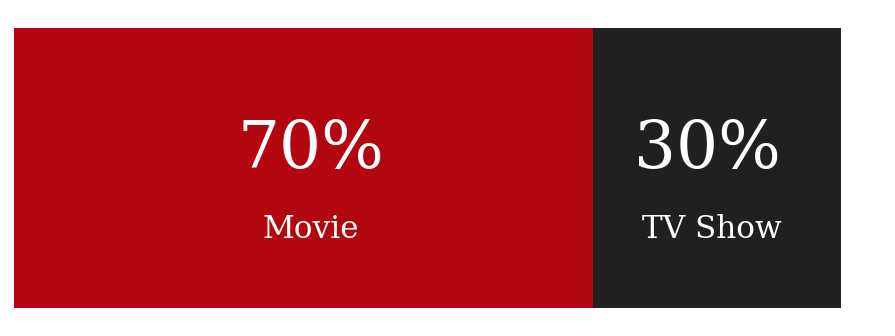

In [194]:
fig_ratio, ax_ratio = plt.subplots(figsize=(6.5,2.5))
movie_count = len(df[df.type == "Movie"])
tv_show_count = len(df[df.type == "TV Show"])
movie_percentage = int(round(100*movie_count/(movie_count+tv_show_count),2))
tv_show_percentage = 100 - movie_percentage
labels = 'type'
plt.rcParams['font.family'] = ['serif']

ax_ratio.barh(labels,tv_show_percentage+movie_percentage,color = '#221f1f')
ax_ratio.barh(labels,movie_percentage,color = '#b20710')

ax_ratio.text(27 , 0 ,str(movie_percentage) + '%',fontsize=34,color = 'white')
ax_ratio.text(75 , 0 ,str(tv_show_percentage) + '%',fontsize=34,color = 'white')
ax_ratio.text(30 , -0.2 ,"Movie",fontsize=16,color = 'white')
ax_ratio.text(76 , -0.2 ,"TV Show",fontsize=16,color = 'white')

ax_ratio.set_yticks([])
ax_ratio.set_xticks([])
ax_ratio.legend() 
ax_ratio.set_alpha(0.9)
ax_ratio.spines[:].set_visible(False)
ax_ratio.legend().set_visible(False)
plt.tight_layout()
plt.show()

<h2 dir=rtl align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
نمودار دوم (ده کشور برتر)
</font>
</h2>

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
    در این نمودار با استفاده از یک نمودار میله‌ای، ده کشوری که بیشترین محتوا در نتفلیکس دارند را نشان دهید.
    <br>
    جزئیاتی که باید در نمودار رعایت کنید :
    <br>
</font>    
</p>

<ul style="direction: rtl;text-align: right;", face="vazir" size=3>

<li>
    figsize = (12, 6)
</li>    
    
<li>
رنگ میله سه کشور اول:
    #b20710
</li>     
    
<li>
رنگ میله باقی کشورها: 
    #f5f5f1 
</li>   

   
  
<li> محور‌های بالا، چپ و راست را حذف کنید (می‌توانید کلید واژه spines 
را جستجو کنید)
    </li>   
    

<li>    
نام United States را به US و United Kingdom را به UK و South Korea را به S. Korea تغییر دهید. 
</li> 
    
<li>
fontfamily = serif
</li>   
    
<li>
    alignment متن‌ها را center قرار دهید 
</li>    

<li>
labelsize=12
<br>
length = 0 ( در tick_params )    
</li>    
    
<li>
محور افقی با گام ۵۰۰
</li>    
</ul>    


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


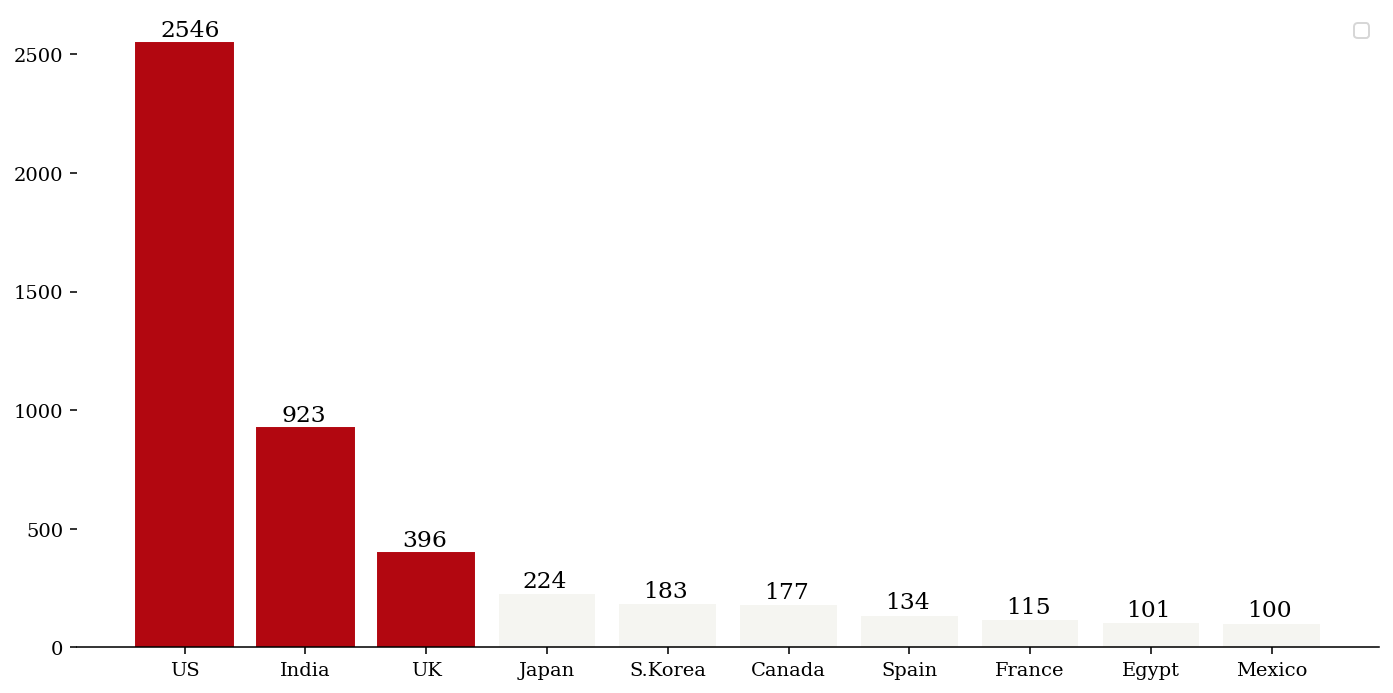

In [81]:
fig_top10, ax_top10 = plt.subplots(figsize=(12,6))
plt.rcParams['font.family'] = ['serif']
ax_top10.legend()
# creating wanted data frame
df_country = pd.concat([df.show_id, df.country],axis = 1)
df_country = df_country.groupby('country').count()
df_country = df_country.reset_index()
df_country = df_country.sort_values('show_id',ascending = False).head(10)


# changing country names
df_country  = df_country.replace("United States","US")
df_country  = df_country.replace("United Kingdom","UK")
df_country  = df_country.replace("South Korea","S.Korea")
df_country = df_country.reset_index()

bar_plot = ax_top10.bar(df_country.country , df_country.show_id,color = '#f5f5f1',align = 'center')

# coloring bars
bar_plot[0].set_color('#b20710')
bar_plot[1].set_color('#b20710')
bar_plot[2].set_color('#b20710')

#text
for i in range(10):
#     print(df_country.show_id[i])
    ax_top10.text(i-0.2,  df_country.show_id[i]+30, df_country.show_id[i],fontsize = 12)

ax_top10.spines[['top','left','right']].set_visible(False)
plt.show()
# df_country

<h2 dir=rtl align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
نمودار سوم (تعداد محتوای منتشر شده در هر سال)
</font>
</h2>

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
    در این نمودار تعداد محتوای منتشر شده در هر سال از سال ۲۰۰۸ تا ۲۰۲۰ را به تفکیک فیلم و سریال نشان دهید.
    <br>
    جزئیاتی که باید در نمودار رعایت کنید :
    <br>
</font>    
</p>

<ul style="direction: rtl;text-align: right;", face="vazir" size=3>

<li>
    figsize = (12, 6)
</li>    
    
<li>
رنگ بخش فیلم‌ها:
    #b20710
</li>     
    
<li>
رنگ بخش سریال‌ها:
    #221f1f 
</li>   

<li>    
alplha: 0.9    
</li>    
   
  
<li> محور‌های دور نمودار را حذف کنید (می‌توانید کلید واژه spines 
را جستجو کنید)
    </li>   
    

<li>    
داده 
</li> 
    
<li>
fontfamily = serif
</li>   
    
<li>
alignment متن‌ها را center قرار دهید 
</li>    

<li>
labelsize=12
<br>
length = 0 ( در tick_params )    
</li>    
    
<li>
xlim(2008,2020)   
</li>    
    
<li>
لیبل‌های محور y را در سمت راست قرار دهید
</li>    
    
<li>
grid = False    
</li>    
    
<li>
یک خط با این مشخصات روی محور افقی بکشید:
<br>
رنگ: black
<br>
عرض خط: 13   
<br>
مقدار alpha: 0.7     
</li>    
    
<li>
مشخصات متن Movie|TV Show:
<br>
fontweight="bold", fontfamily='serif', fontsize=15    
<br>
رنگ متن Movie:
#b20710
<br>
رنگ جدا کننده (|):
black
<br>
رنگ متن Tv Show:
#221f1f    
</li>    
</ul>    


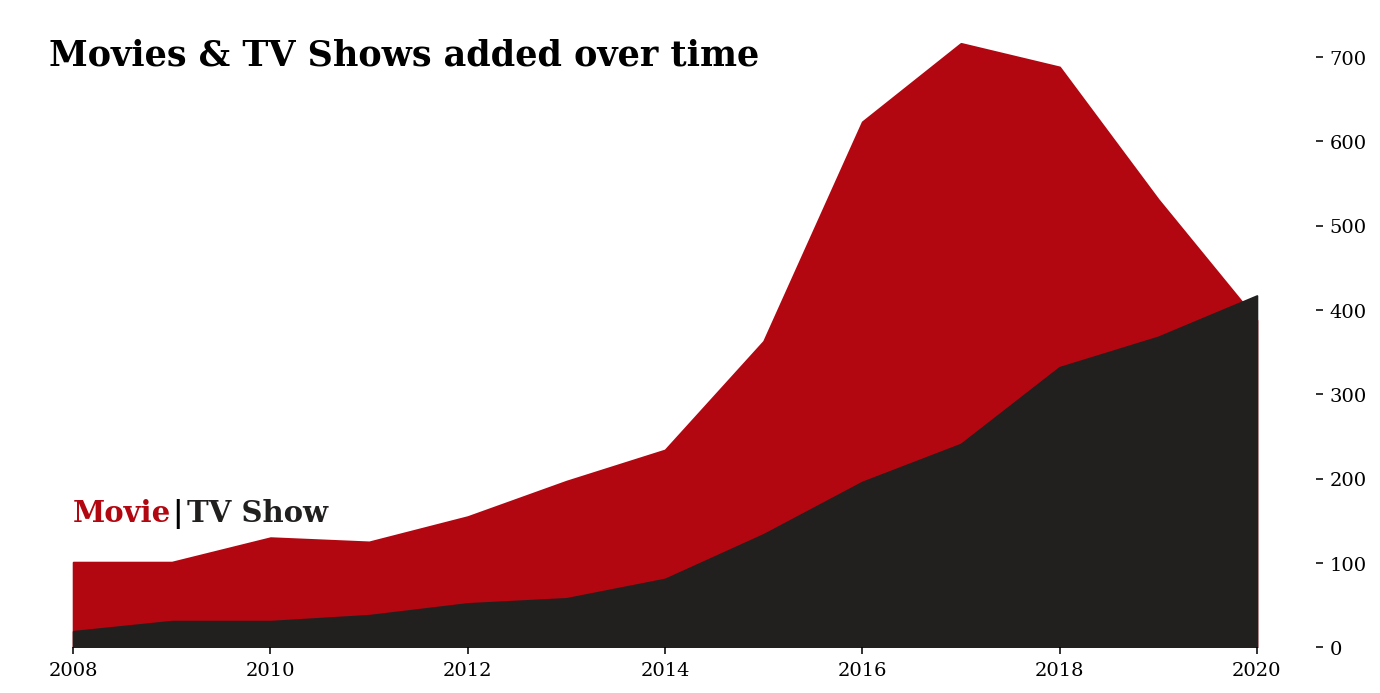

In [218]:
fig_mediaOverTime, ax_mediaOverTime = plt.subplots(figsize = (12,6)) 
ax_mediaOverTime.set_alpha(0.9)
ax_mediaOverTime.spines[:].set_visible(False)

# creating wanted dataframe
media_over_year = pd.concat([df.type , df.release_year],axis =1)
movie_over_year = media_over_year[media_over_year.type == "Movie"]
tvshow_over_year = media_over_year[media_over_year.type == "TV Show"]
movie_over_year = movie_over_year.groupby('release_year').count().rename(columns = {'type': 'movie_count'})
tvshow_over_year = tvshow_over_year.groupby('release_year').count().rename(columns = {'type': 'tvshow_count'})
media_over_year = movie_over_year.merge(tvshow_over_year ,how = 'outer', on = 'release_year')
media_over_year = media_over_year.fillna(0)
media_over_year = media_over_year.reset_index()
media_over_year = media_over_year[media_over_year['release_year'] >= 2008]
media_over_year = media_over_year[media_over_year['release_year'] <= 2020]
media_over_year = media_over_year.reset_index()

# plot
ax_mediaOverTime.stackplot(media_over_year.release_year, media_over_year.movie_count, color = '#b20710')
ax_mediaOverTime.stackplot(media_over_year.release_year, media_over_year.tvshow_count, color = '#221f1f')
ax_mediaOverTime.set_title("Movies & TV Shows added over time",x = 0.3 ,y = 0.9,fontsize = 18 , fontweight= 'bold')
ax_mediaOverTime.yaxis.tick_right()

# text
ax_mediaOverTime.text(2008,150,"Movie",color = '#b20710',fontsize = 15, fontweight= 'bold')
ax_mediaOverTime.text(2009,150,"|",color = 'black',fontsize = 15, fontweight= 'bold')
ax_mediaOverTime.text(2009.15,150,"TV Show",color = '#221f1f',fontsize = 15, fontweight= 'bold')

plt.show()

## <h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
<b>سلول جواب‌ساز</b>
</font>
</h2>


In [ ]:
import zlib
import zipfile
import joblib

joblib.dump(fig_ratio,"fig_ratio")
joblib.dump(fig_top10,"fig_top10")
joblib.dump(fig_mediaOverTime,"fig_mediaOverTime")

def compress(file_names):
    print("File Paths:")
    print(file_names)
    # Select the compression mode ZIP_DEFLATED for compression
    # or zipfile.ZIP_STORED to just store the file
    compression = zipfile.ZIP_DEFLATED
    # create the zip file first parameter path/name, second mode
    with zipfile.ZipFile("result.zip", mode="w") as zf:
        for file_name in file_names:
            # Add file to the zip file
            # first parameter file to zip, second filename in zip
            zf.write('./' + file_name, file_name, compress_type=compression)


file_names = ["fig_ratio","fig_top10","fig_mediaOverTime", "netflix.ipynb"]
compress(file_names)